# 숫자 더하기
- 인풋을 리스트로 만들어주기
- 몇개의 숫자가 있냐

In [ ]:
N=input()
numbers=list(input())
sum=0

for i in numbers:
    sum=sum+int(i)

print(sum)

# 구간 합
- 합 배열을 만들자
- S[i] = S[i-1]+A[i]

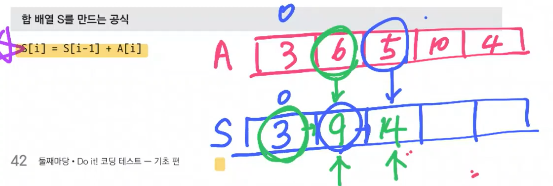

- S[j]- S[i-1]

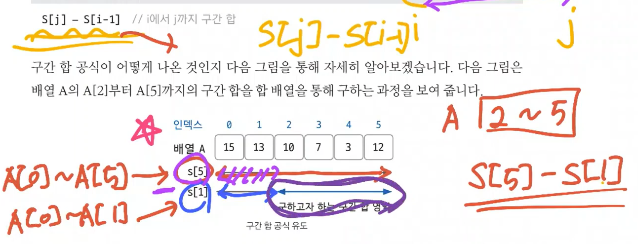

# 구간 합 구하기 2

- 백준 11660
- 질의의 범위가 많을 경우 정답판을 만들어놓고 질의가 올때마다 답을 출력하는 방법을 취해야한다--> 시간 복잡도 때문에
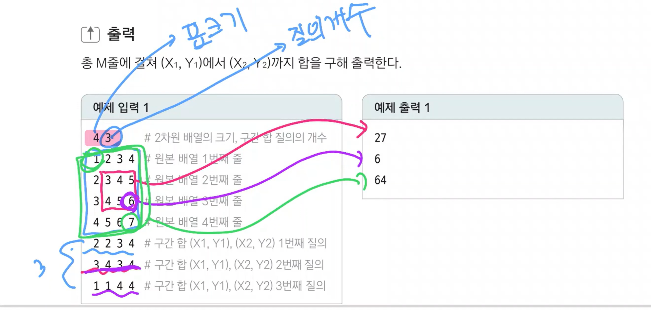

- 즉 정답판의 구성은 D[x][y] = 원본 배열의 (0,0)부터 (x,y)까지의 사각형 영역안에 있는 수의 합을 채워넣는다
- 첫번째 가로 세로열은 누적합의 값으로
- 안에 채울때는 겹치는 부분을 빼고 더하기
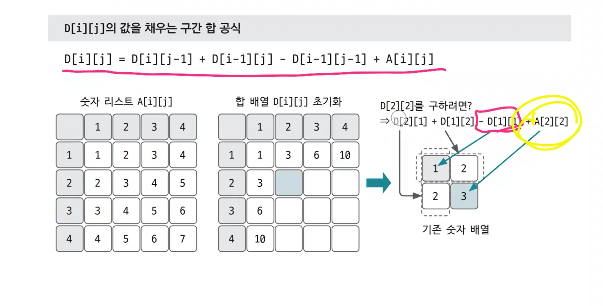

- 이제 구간 합 배열에 대해서 보면
- 우리는 합배열 매트릭스로 만들었다는 것을 기억해야함!!
- 따라서 합배열에서 구간에 포함되지 않는 아이들을 빼줘야함!!
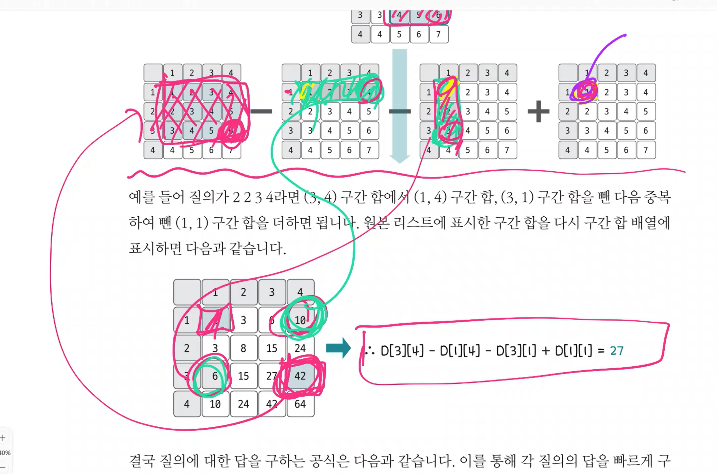

In [ ]:
import sys

input=sys.stdin.readline # 한방에 모든 데이터 불러오기

n,m = map(int, input().split()) # n=4 / m=3

A=[[0]*(n+1)] # 0으로 채워진 n+1개의 행
D=[[0]*(n+1) for _ in range(n+1)] # 0으로 채워진 n+1*n+1 why? 0부터 시작하니까 4*4로 만들기 위해서

for i in range(n):
    A_row = [[0] + int(x) for x in input().split()] #matrix로 만드는데 0 1 2 3 ..이런식으로 0부터 채우기 위함!
    A.append(A_row)

# 합 매트릭스를 만들거야
for i in range(1,n+1):
    D[i][j] = D[i][j-1] + D[i-1][j] - D[i-1][j-1] + A[i][j]

for _ in range(m):
    x1,y1,x2,y2 = map(int, input().split())
    result=D[x2][y2]-D[x1-1][y2]-D[x2][y1-1]+D[x1-1][y1-1]
    print(result)

# 구간 합 3
- 백준 10986

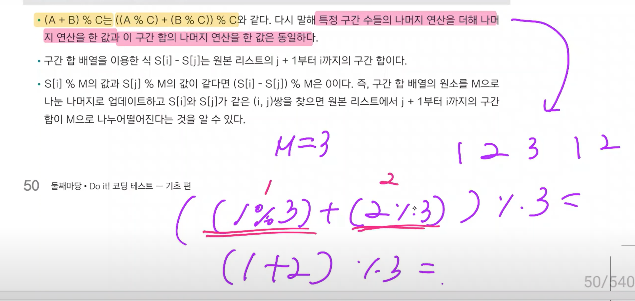

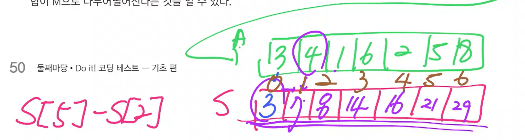

- 즉, 합 배열을 만들어 3을 나누면 된다!

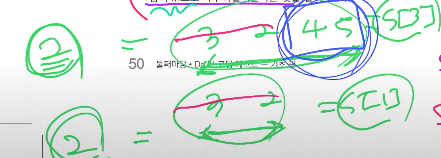

- 더 나아가 합배열의 특정 인덱스의 나머지를 구해봤을때, 그 나머지가 같다면!! ex.S[3] 나머지 = S[1] 나머지  --> S[3] - S[1]의 구간 나머지는 0이 된다!! 즉, 나누어 떨어진다!!

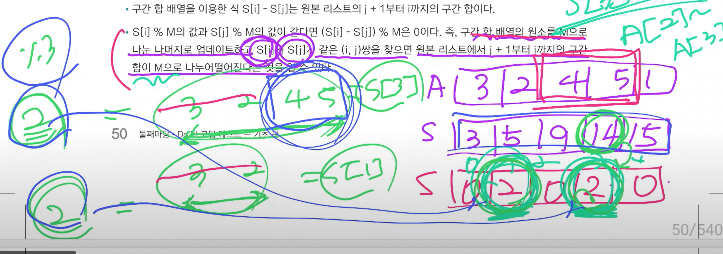

- 따라서 업데이트 배열을 만들면 된다!!
- 마지막으로 업데이트된 배열의 값이 같을 경우 그 구간은 3으로 나눠떨어진다고 볼 수 있다


1. 업데이트 된 배열의 0의 값을 센다 
2. 나머지가 같은 아이들의 구간의 조합 갯수를 구한다 (구간은 2개를 뽑아줘야한다!) --> 여기서는 0이 3개/ 1이 2개이므로 3개에서 2개를 뽑는 조합/ 2개에서 2개를 뽑는 조합
3. 1번에서 구한 값과 2번에서 구한 값을 더한다! --> 정답!!

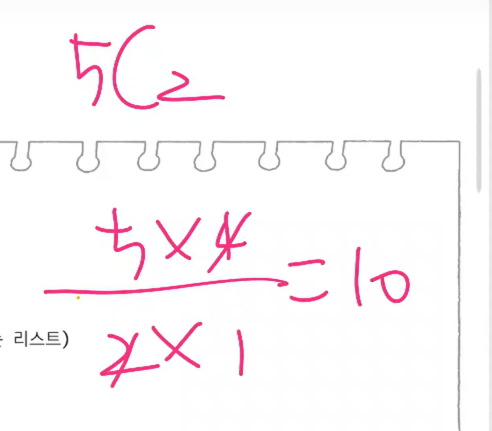

In [ ]:
import sys
input = sys.stdin.readline
n,m=mape(int, input().split()) #n= 원소 갯수 / m= 나눠떨어져야하는 수
A=list(map(int, input().split())) # 배열

S=[0]*n
C=[0]*m # 나눴을떄 같은 값을 갖는 아이들을 선언하기 위해 만들었음 / 죽, 3으로 나누었을때 가능한 나머지수를 카운트하기 위해 만듦

answer=0

S[0]=A[0]
for i in range(1,n):
    S[i] = S[i-1]+A[i] # 합배열을 만든다
    
for i in range(n): #원소 각각 들어감
    remainder = S[i]%m # 3으로 나눈 나머지 값
    if remainder==0: # 나누어 떨어지면!
        answer+=1 # 1. 나머지가 0인 값을 센다
    C[remainder]+=1 # 3으로 나눈 나머지 값을 카운트!  

for i in range(m):
    if C[i]>1: # 나머지 값이 한번 이상 나왔다면!!
        answer += C[i]*(C[i]-1//2) # 2. 3. 조합 구해서 더하기!
        
print(answer)

# 슬라이딩 윈도우 문제
- 백준 11003
1. 최솟값 가능성이 없는 데이터 삭제
2. window 크기 밖 데이터 삭제

- 슬라이딩 갯수는 L
- N은 배열의 수
- 정렬은 시간 복잡도가 크다
- deque를 사용하자 --> 제일 왼쪽 제일 오른쪽 값을 빼고 넣을 수 있음
- 우리는 (인덱스, 숫자) 이런식으로 저장할 예정

1. 하나하나 (인덱스, 숫자)값을 추가해줌
2. 인덱스는 L 범위를 위해 만들어짐 --> (L범위를 넘으면 삭제하기 위함)
3. 숫자에서 min값이 아닌건 삭제
4. (인덱스, 숫자) --> 숫자를 업데이트! min값을 구해야한다

In [5]:
import sys
from collections import deque
input = sys.stdin.readline

N,L = map(int, input().split()) #N의 배열 갯수. L이 window수
mydeque=deque();
now=list(map(int, input().split()))

for i in range(N): #N번 돌릴거임
    # 1. 나보다 큰 데이터 삭제하기
    while mydeque and mydeque[-1][0] > now[i]: #존재하고 있던 숫자가 다음에 들어올 숫자보다 클 경우+ mydeque가 존재할때까지 loop
        mydeque.pop()
        
    mydeque.append((now[i], i)) # 처음 loop에서 mydeque에 (now[0], 인덱스 0) 값을 넣어주게됨 --> 이후 차례로 now의 값을 append
    
    #2. 윈도우 값 벗어나는 데이터 삭제
    if mydeque[0][1] <= i-L : #맨 처음 인덱스값이 L을 넘어간다면 즉, 윈도우 범위를 벗어나면
        mydeque.popleft() # 맨 처음 값을 drop시킬거야
        
    print(mydeque[0][0], end=' ')  #공백을 포함해서 Print

# 스텍 & 큐
- 스택 : 후입선출 LIFO 그릇 안에 값이 담겨있다고 생각하기
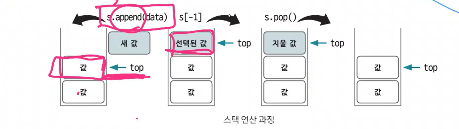

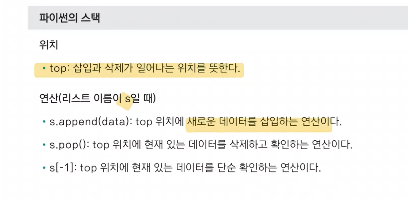

- 큐: 선입선출 FIFO
- deque를 이용해서 큐를 구현함
- List도 가능하지만 시간 복잡도가 deque가 훨씬 빠름!
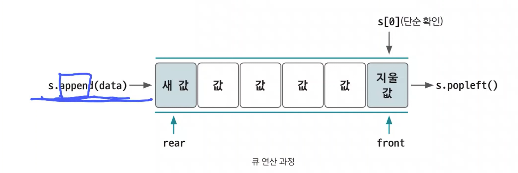

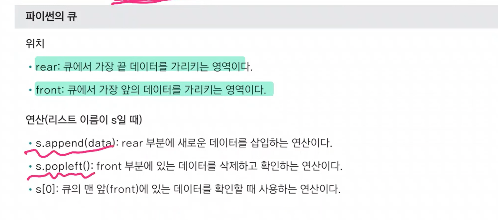

- 우선 순위 큐: 가장 큰 값 순서대로 자동으로 정렬됨!
- Heap

# 오큰 수 구하기 
- 백준 17298
- 오큰수란? NGE(3)이라고 한다면! 3번째 자리 이후에 나타나는 값 중에 가장 왼쪽에 위치하는 가장 큰 수! 
- 오른쪽에 더이상 값이 없을 경우 -1

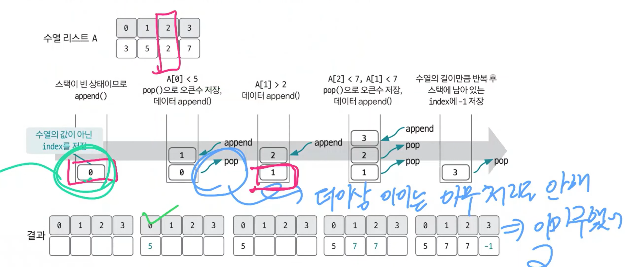

1. 현재 값이랑 이후 값을 비교해서 큰 값이 있으면 바로 append --> 처음 있던 값 pop
2. 새로 들어오는 값이 top에 있는 값을 비교해보고 오큰 수 넣기 
3. 반복

- 오큰 수 조건
제일 오른쪽에 위치한 숫자와 앞의 숫자를 

In [ ]:
n = int(input())
ans=[0]*n
A=list(map(int, input().split()))
myStack=[] #인덱스를 append

for i in range(n):
    while myStack and A[myStack[-1]] < A[i]: # 오큰 수 조건
        ans[myStack.pop()]=A[i] # 정답 리스트에 오큰 수 저장
    myStack.append(i)
    
while myStack:
    ans[myStack.pop()] = -1
    
result = ''

for i in range(n):
    result+=str(ans[i])+ " "

print(result)
        

In [23]:
# 조금 변형..!

n= 4
answer=[]
A=[3,5,2,7]
B=[] #3, 5,3,7

for _ in range(n):
    while B and B[-1]<A[_]:
        answer.append(A[_])
        B.pop()
    B.append(A[_])

# 맨마지막 수는 무조건 -1이니까
answer.append(-1)

result=''
for i in answer:
    result+=str(i)+' '
    
print(result)

5 7 7 -1 
